# A Larger Example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#one-hot encoding our dataset
insurance_onehot=pd.get_dummies(insurance,dtype=int)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
insurance_onehot.dtypes

,0
age,int64
bmi,float64
children,int64
charges,float64
sex_female,int64
sex_male,int64
smoker_no,int64
smoker_yes,int64
region_northeast,int64
region_northwest,int64


In [ ]:
#creating x and y i.e independent and dependent variables
x=insurance_onehot.drop(labels=['charges'],axis=1)
y=insurance_onehot['charges']

In [ ]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
#creating train and test spilts
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x),len(x_train),len(x_test)

(1338, 1070, 268)

In [ ]:
import numpy as np

print(np.isnan(x_train).sum(), np.isinf(x_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())


age                 0
bmi                 0
children            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64 age                 0
bmi                 0
children            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
0 0


In [ ]:
#Build a neural network
tf.random.set_seed(42)

#create a model

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
],name='insurance')

#compile model

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit model

insurance_model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 13158.1963 - mae: 13158.1963
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10894.1396 - mae: 10894.1396
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7446.0620 - mae: 7446.0620
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7201.1460 - mae: 7201.1460
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7096.5430 - mae: 7096.5430
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6977.2954 - mae: 6977.2954
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6842.3301 - mae: 6842.3301
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6684.7852 - mae: 6684.7852
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6551.9521 - mae: 6551.9521
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6505.4072 - mae: 6505.4072
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6474.6909 - mae: 6474.6909
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

In [ ]:
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3221.0903 - mae: 3221.0903


[3164.283203125, 3164.283203125]

In [ ]:
#Build a neural network
tf.random.set_seed(42)

#create a model

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',name='input_layer'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
],name='insurance_2')

#compile model

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit model

history=insurance_model_2.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 13207.8623 - mae: 13207.8623
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10348.7783 - mae: 10348.7783
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7355.4668 - mae: 7355.4668
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7147.6753 - mae: 7147.6753
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6969.6758 - mae: 6969.6758
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6775.9976 - mae: 6775.9976
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6590.0703 - mae: 6590.0703
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6505.8979 - mae: 6505.8979
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6451.8350 - mae: 6451.8350
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6406.0156 - mae: 6406.0156
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6356.4741 - mae: 6356.4741
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [ ]:
insurance_model_2.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1699.9429 - mae: 1699.9429


[1748.3719482421875, 1748.3719482421875]

In [ ]:
insurance_model_2.predict(x_test)[:10]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[ 9165.473 ],
       [ 5183.6714],
       [29180.71  ],
       [ 9467.307 ],
       [27182.37  ],
       [ 4495.6504],
       [ 2019.8611],
       [14332.425 ],
       [ 3695.6648],
       [10415.138 ]], dtype=float32)

In [ ]:
t=tf.constant(y_test[:10].values)

In [ ]:
tf.squeeze(insurance_model_2.predict(x_test)[:10])-tf.cast(t,dtype=tf.float32)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([   70.4043  ,   -88.504395,  -150.27148 ,   165.41309 ,
       -6567.924   ,   -40.6084  ,   -97.47778 ,   121.88867 ,
         -36.960205,   150.69531 ], dtype=float32)>

Text(0.5, 0, 'epochs')

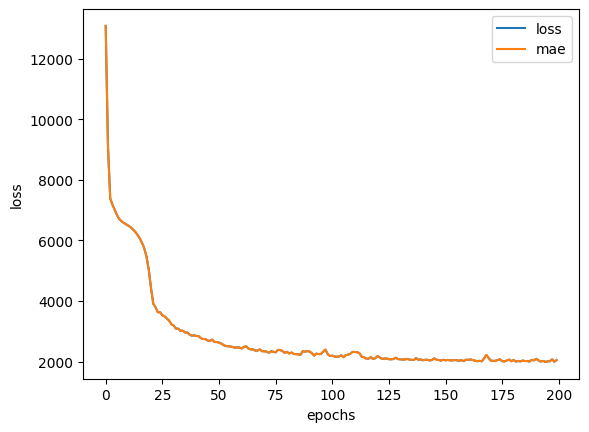

In [ ]:
#plot loss curve also known as training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### How log do you train for?
well it depends on the problem u are solving
but tensorflow has a solution for you called
`early stopping callback` it is a tensorflow component which u cann add to your model so that it stops training once it stops improving the metric

# Prepocessing Data (Normalization and Standardization)
In terms of scaling values Neural netowrks prefer normalization
u can try both
* Standardization : removes the mean and divides each values by std deviation
* Normalization : converting all values to between 0 and 1

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#read data
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### To prepare our dataset we need few components from sklearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer
ct =make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)


#create X and Y
x=insurance.drop('charges',axis=1)
y=insurance['charges']

#create train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#fit column transformer to training data
ct.fit(x_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)


In [ ]:
#what does our data look like
x_train.iloc[0]

,560
age,46
sex,female
bmi,19.95
children,2
smoker,no
region,northwest


In [ ]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train.shape,x_train_normal.shape

((1070, 6), (1070, 11))

Now our data is cleaned i.e Normalized and Standardised

<Axes: ylabel='Frequency'>

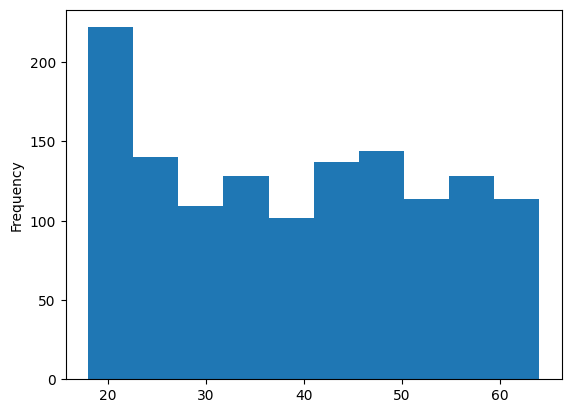

In [ ]:
x['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

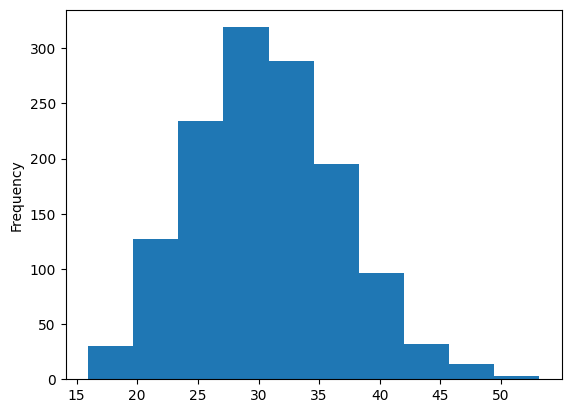

In [ ]:
x['bmi'].plot(kind='hist')

In [ ]:
print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1070, 6)
(1070,)


In [ ]:
#Build a neural network
tf.random.set_seed(42)

#create a model

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',name='input_layer'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
],name='insurance')

#compile model

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit model

history=insurance_model.fit(x_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 13293.9951 - mae: 13293.9951
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12940.3994 - mae: 12940.3994
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8930.6953 - mae: 8930.6953
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7483.2036 - mae: 7483.2036
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6756.4033 - mae: 6756.4033
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5664.7832 - mae: 5664.7832
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4527.8105 - mae: 4527.8105
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3852.7324 - mae: 3852.7324
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3461.4050 - mae: 3461.4050
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3370.7959 - mae: 3370.7959
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3343.0930 - mae: 3343.0930
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [ ]:
insurance_model.evaluate(x_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1515.8385 - mae: 1515.8385


[1609.63037109375, 1609.63037109375]

In [ ]:
#9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1699.9429 - mae: 1699.9429
#[1748.3719482421875, 1748.3719482421875]

Text(0.5, 0, 'epochs')

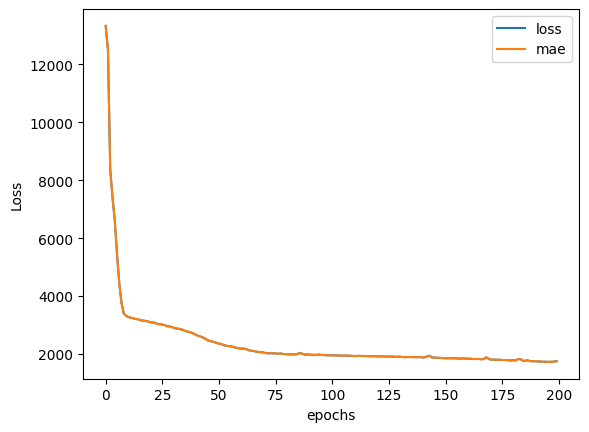

In [ ]:
#plot loss curv

pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('epochs')